# Laplaciano

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

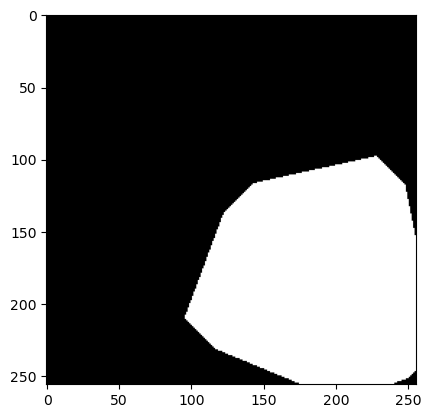

In [2]:
spotImg = cv2.imread("images/SPOT.png")
plt.imshow(spotImg, cmap='gray', vmin=0, vmax=255)

In [3]:
spotImg = spotImg.astype(np.int16)

*Filtro Laplaciano*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


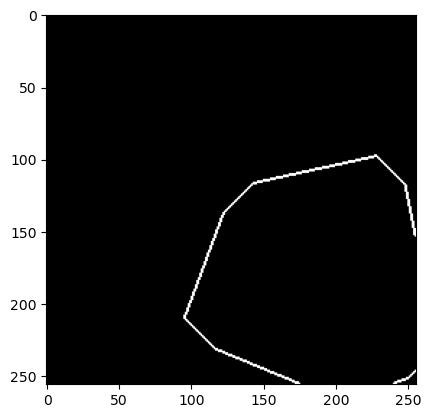

In [4]:
from skimage.filters import laplace

img_l = laplace(spotImg, ksize=3)
img_l = np.absolute(img_l)
img_l = exposure.rescale_intensity(img_l, in_range=(np.min(img_l), np.max(img_l)), out_range=(0,255))
plt.imshow(img_l, cmap='gray')

Lo que podemos ver es que en las regiones homogéneas el laplaciano es 0, esto se debe a que no hay un cambio considerable en la intensidad del color, y el laplaciano al ser la segunda derviada mide que tan rápido cambia el color en la imágen. Por otro lado en los bordes se acelera o desacelera el cambio de color, por este motivo se ven blancos, puesto que el laplaciano es un valor muy alto o muy bajo pero dado que sacamos el valor absoluto este efecto se anula y se pasa a 255 que es blanco.

*Operador LoG*

C:\Users\incar\AppData\Local\Temp\ipykernel_26908\876380621.py:3: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  img_s = gaussian(spotImg, sigma=0, preserve_range=True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


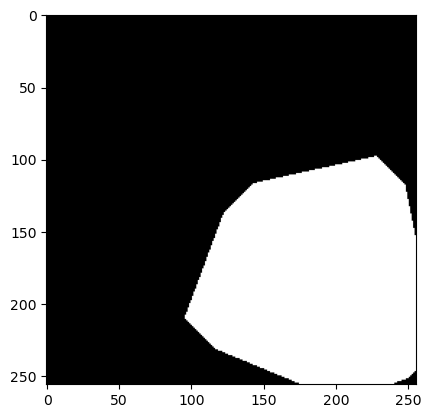

In [5]:
from skimage.filters import gaussian

img_s = gaussian(spotImg, sigma=0, preserve_range=True)
plt.imshow(img_s, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


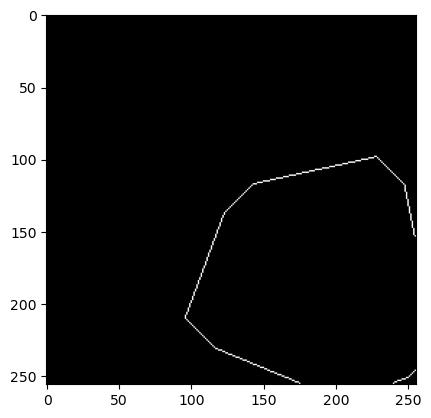

In [6]:
img_log0 = laplace(img_s, ksize=3)
img_log0_cal = exposure.rescale_intensity(img_log0, (np.min(img_l), np.max(img_l)), out_range=(0, 255))

plt.imshow(img_log0_cal, cmap='gray')

Al poner este filtro Gaussiana en teoría la imágen debe estar intacta, sin embargo parece que al cambiar a valores normalizados (0, 1) entonces la precisión aumenta y por eso podemos ver el borde más fino y con más claridad.

C:\Users\incar\AppData\Local\Temp\ipykernel_26908\168887244.py:2: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  img_g1 = gaussian(spotImg, sigma=1, preserve_range=True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..83.9015792224339].


Text(0.5, 1.0, 'LoG con sigma = 1')

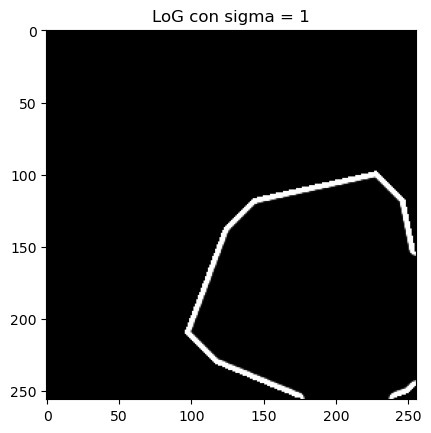

In [7]:
# Filtro Gaussiano con sigma = 1
img_g1 = gaussian(spotImg, sigma=1, preserve_range=True)

# Aplicar Laplaciano
img_log1 = laplace(img_g1, ksize=3)

# Calibración para ver el resultado
img_log1_cal = exposure.rescale_intensity(img_log1, in_range=(np.min(img_l), np.max(img_l)), out_range=(0, 255))

plt.imshow(img_log1_cal, cmap='gray')
plt.title("LoG con sigma = 1")

En este caso tenemos un borde más ancho y menos preciso, esto ocurre porque el filtro Gaussiano suaviza la imágen para evitar que el Laplaciano amplifique el ruido, sin embargo el costo de esto es que los bordes se engrosen y pierdan precisión.

C:\Users\incar\AppData\Local\Temp\ipykernel_26908\4009273936.py:2: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  img_g2 = gaussian(spotImg, sigma=2, preserve_range=True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..23.184000227175886].


Text(0.5, 1.0, 'LoG con sigma = 2')

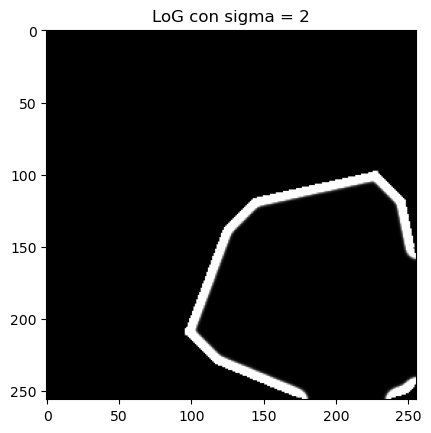

In [8]:
# Filtro Gaussiano con sigma = 2
img_g2 = gaussian(spotImg, sigma=2, preserve_range=True)

# Aplicar Laplaciano
img_log2 = laplace(img_g2, ksize=3)

# Calibración para ver el resultado
img_log2_cal = exposure.rescale_intensity(img_log2, in_range=(np.min(img_l), np.max(img_l)), out_range=(0, 255))

plt.imshow(img_log2_cal, cmap='gray')
plt.title("LoG con sigma = 2")

Por último este filtro lo que hace es poner un borde muy ancho y poco preciso, debido a que la imágen tiene mucha menos precisión debido a la desviación de nuestro filtro Gaussiano.

*Comparación entre Sobel y LoG*

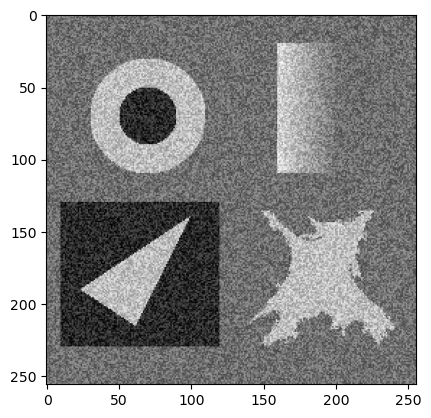

In [9]:
bruitImg = cv2.imread("images/BRUIT.png", 0)
bruitImg = bruitImg.astype(np.int64)
plt.imshow(bruitImg, cmap='gray')

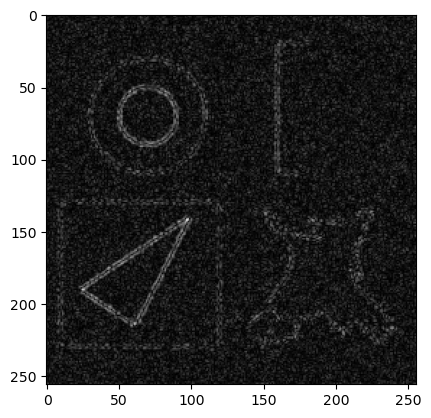

In [10]:
imgBru_g = gaussian(bruitImg, sigma=1, preserve_range=True)

imgBru_lap = laplace(imgBru_g, ksize=4)
imgBru_lap = np.absolute(imgBru_lap)
imgBru_lap = exposure.rescale_intensity(imgBru_lap, in_range=(np.min(imgBru_lap), np.max(imgBru_lap)), out_range=(0, 255))


plt.imshow(imgBru_lap, cmap='gray')

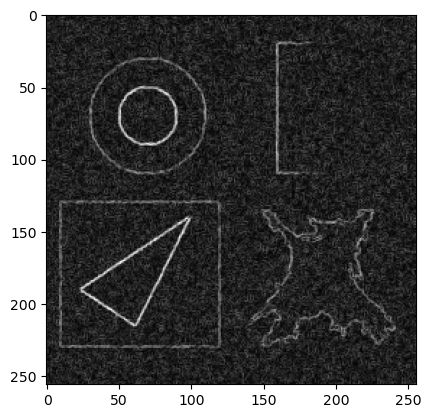

In [11]:
from skimage.filters import sobel
img_sobel = sobel(bruitImg)
plt.imshow(img_sobel, cmap='gray')

Es mucho más fácil detectar contornos en Sobel que en Laplace debido a que este último es mucho más sensible al ruido. Esto se debe a que mientras Sobel detecta cambios en la intensidad del color (primera derivada), Laplace detecta la fuerza del cambio (Segunda derivada). Esto hace que pixeles de ruido que muestran un cambio brusco logren engañar al filtro y evitar que los bordes se vean con la claridad requerida.

*Realce Laplaciano*

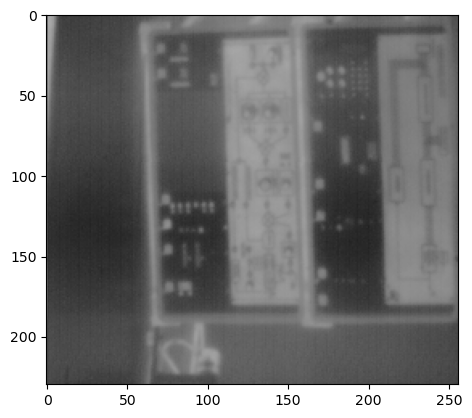

In [12]:
filmImg = cv2.imread('images/FILM.png', 0)
filmImg = filmImg.astype(np.int16)
plt.imshow(filmImg, cmap='gray', vmin=0, vmax=255)

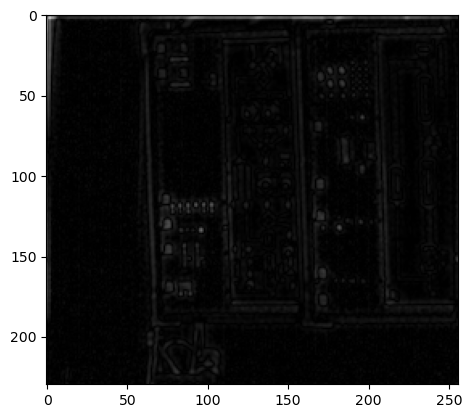

In [13]:
imgFilm_g = gaussian(filmImg, sigma=1, preserve_range=True)

imgFilm_lap = laplace(imgFilm_g, ksize=3)
imgFilm_lap = np.absolute(imgFilm_lap)

plt.imshow(imgFilm_lap, cmap='gray')

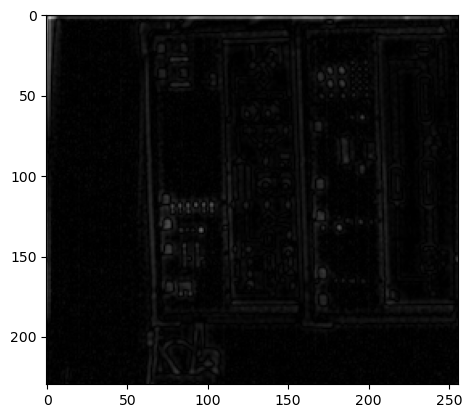

In [14]:
imgFilm_lap = exposure.rescale_intensity(imgFilm_lap, in_range=(np.min(imgFilm_lap), np.max(imgFilm_lap)), out_range=(0, 255))
imgFilm_lap = imgFilm_lap.astype(np.uint8)

plt.imshow(imgFilm_lap, cmap='gray', vmin=0, vmax=255)

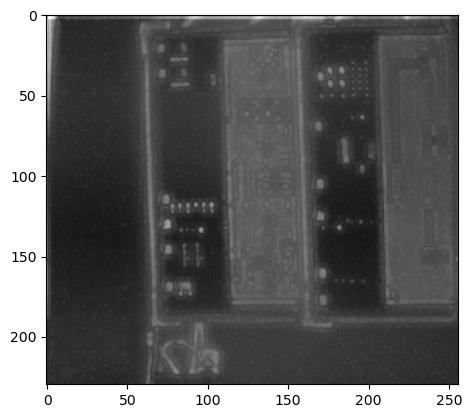

In [15]:
filmImg = filmImg.astype(np.uint8)
origi60 = filmImg * 0.6

realce = origi60 + imgFilm_lap
plt.imshow(realce, cmap='gray', vmin=0, vmax=255)

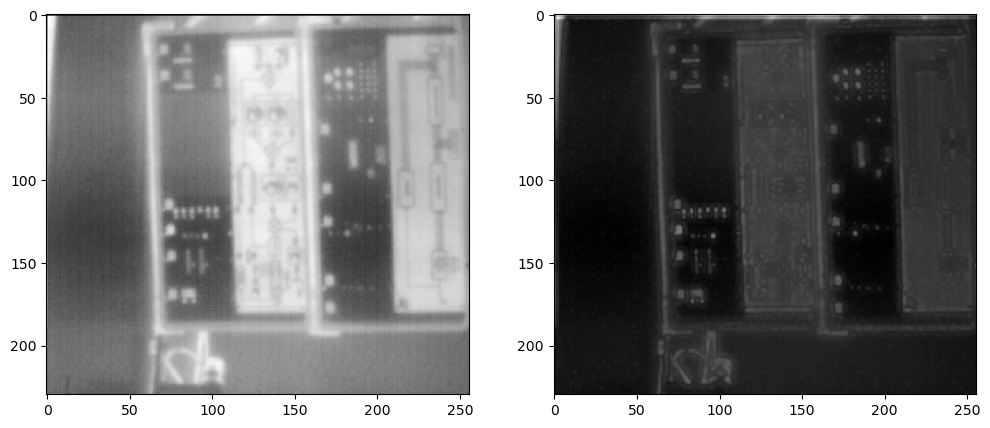

In [28]:
# Expansion contraste
rescaledOriginal = exposure.rescale_intensity(filmImg, in_range=(np.min(filmImg), np.max(filmImg)), out_range=(0, 255))
rescaledRealce = exposure.rescale_intensity(realce, in_range=(np.min(realce), np.max(realce)), out_range=(0, 255))

fig, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].imshow(rescaledOriginal, cmap='gray')
ax[1].imshow(rescaledRealce, cmap='gray')